We will be using the KMeans algorithm which can be summarized as follows:

1. To begin it needs to be gived the data and the K value (we will pick the K value with the highest Silhouette Coefficient).

2. Being given the data as well as the K value which will be the number of centroids and thus the number of clusters, it begins assigning data points to their cluster based on the Euclidean distance of each data point from a centroid.

3. After initially assigning all the data points to a cluster, it cycles between the assignment of data to a cluster and recalculating the centroids until a stopping contition is met(e.g. maximum number of modifications has been made, sum of distances is minimized/no data points need reassigning).


To start, let's import the libraries we are going to use as well as the csv file.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
original_df = pd.read_csv('cc_dataset.csv')

In [3]:
original_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
original_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000





After having a look at the data itself as well as the distribution, we see that some changes need to be made to increase the quality of our results. 

The CUST_ID column seems to contain only unique values which makes it expendable as it can't be separated into groups by similarity. 




In [5]:
#Customer ID is unique and thus irrelevant
original_df = original_df.drop('CUST_ID', axis = 1)

In [6]:
original_df.isna().mean()*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64




Next, we need to handle n/a values and after taking a look at the percentage of such values in each column it is clear that only CREDIT_LIMIT and MINIMUM_PAYMENTS need fixing. 




In [7]:
#Fixing MINIMUM_PAYMENTS and CREDIT_LIMIT
original_df['MINIMUM_PAYMENTS'].fillna(original_df['MINIMUM_PAYMENTS'].median(), inplace = True)
original_df.dropna(subset = ['CREDIT_LIMIT'], inplace = True)




Since we are focusing on grouping the data points into clusters, it is important to asess the situation with outliers as they could make our task more difficult. We will be using simple visualizations to look at how skewed the data is. 




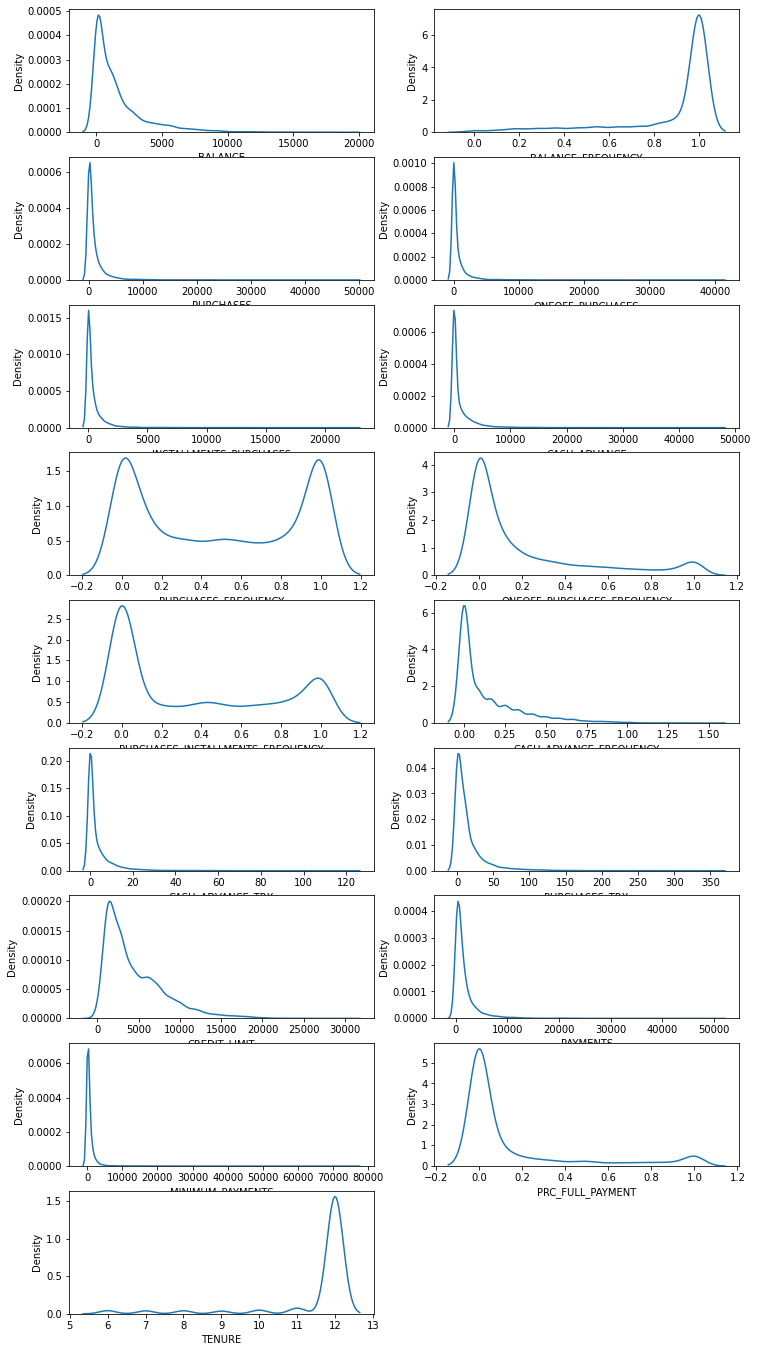

In [8]:
plt.figure(figsize = (12,24))
for i, col in enumerate (original_df.columns):
    if original_df[col].dtype != 'object' :
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(original_df[col], ax = ax)
        plt.xlabel(col)
        
plt.show()        




Our data looks pretty skewed which means we will need to fix that by using the logarithmic function to try to even out our distribution a bit.




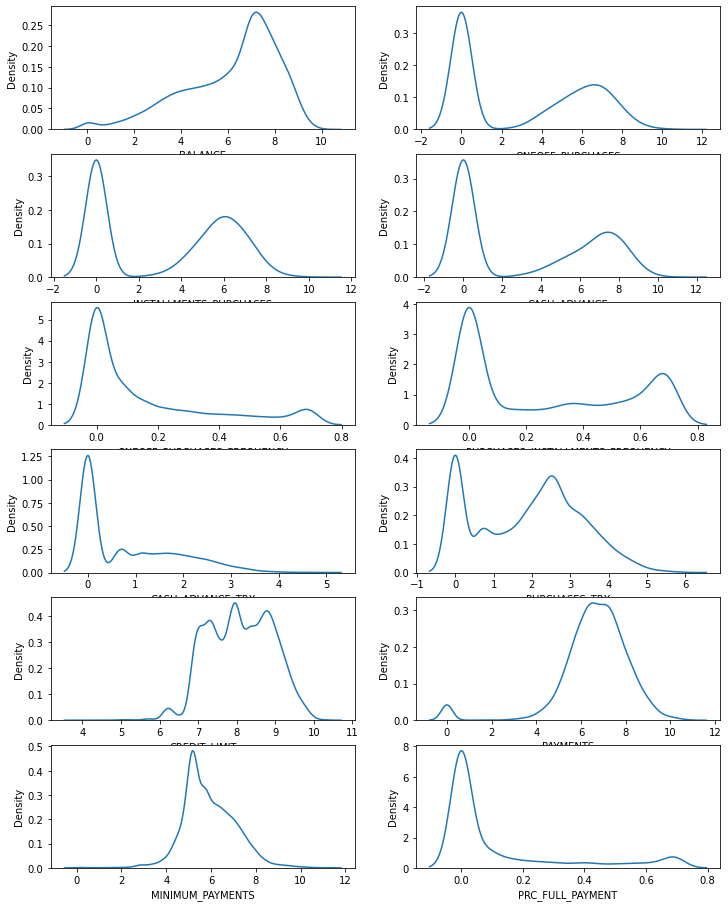

In [9]:
#Fixing skew
cols = ['BALANCE', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
for col in cols:
    original_df[col] = np.log(1 + original_df[col])
    
plt.figure(figsize=(12,24))
for i, col in enumerate(cols):
    
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(original_df[col], ax=ax)
plt.show()   


Applying the logarithmic function to our data clearly worked as intended which means now we can move on to looking for correlations and what better way there is to do that than with the help of visualizations. 


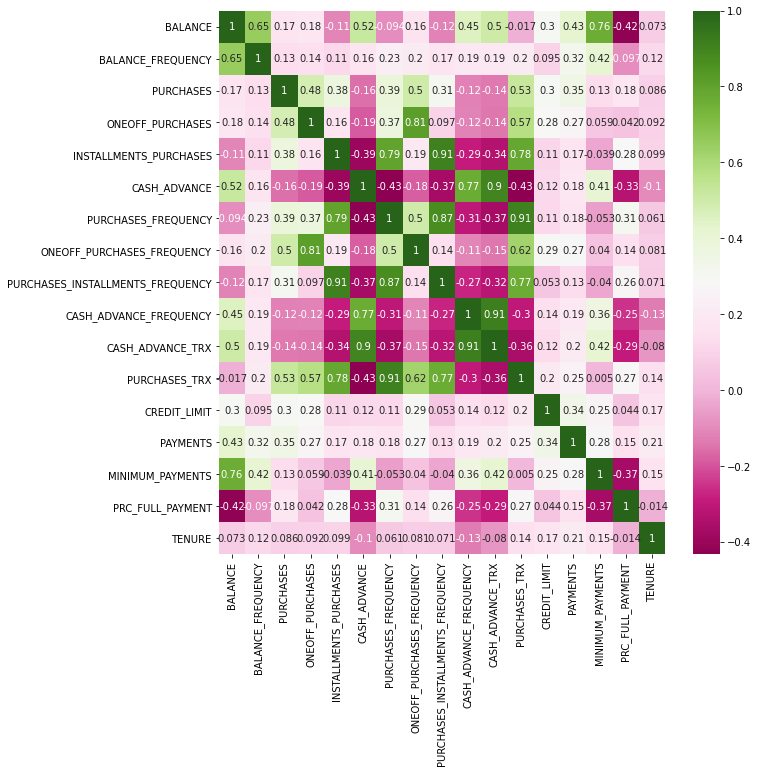

In [10]:
#Looking for correlations
plt.figure(figsize=(10,10))
sns.heatmap(original_df.corr(), annot = True, cmap="PiYG")
plt.show()





By looking at the heatmap above we can see that the features that are most positively correlated are:

    * INSTALLMENT_PURCHASES and PURCHASES_INSTALLMENT_FREQUENCY
    * CASH_ADVACE and CASH_ADVANCE_TRX
    * PURCHASES_FREQUENCY and PURCHASES_TRX
    
While the features with the strongest negative correlation are:

    * BALANCE and PRC_FULL_PAYMENT
    * CASH_ADVANCE and INSTALLMENT_PURCHASES
    * CASH_ADVANCE and PURCHASES_FREQUENCY
    * CASH_ADVANCE and PURCHASES_TRX
    * MINIMUM_PAYMENT and PRC_FULL_PAYMENT
    
Most of those are self-explanatory, for example it makes sense that people who mostly choose to pay the full price straight away would have a lower balance or that people who choose cash advance more often have fewer installment purchases. 



Now let's standardize and normalize our dataset before proceeding to PCA (Principal Component Analysis) which will reduce linear dimensionality within the data. 





In [11]:
original_df = original_df.reset_index()

#Standardizing dataset
scl = StandardScaler()
scl_df = scl.fit_transform(original_df)

#Normalizing dataset
norm_df = normalize(scl_df)

#Numpy array --> Pandas df
norm_df = pd.DataFrame(norm_df)

In [12]:
#PCA
pca = PCA(n_components = 2)
X_r = pca.fit_transform(norm_df)

pca = PCA(n_components = 2) 
X_r = pca.fit_transform(norm_df) 
X_r = pd.DataFrame(X_r) 
X_r.columns = ['P1', 'P2'] 




Since our data is now ready to be sumbitted to the KMeans algorithm, we need to do one last thing: pick the K value for it by using the Silhouette Coefficient method. 

It works by looping through the possible K values we give it to calculate the mean distance between the sample and its class as well as the other classes. A higher Silhouoette Coefficient means that a sample is best matched to its class and poorly matched to other classes. 

We will give it the values 2,3,4,5,6 and 7 to try and see which of those would make the best K value. 




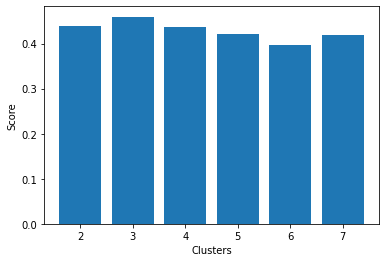

In [13]:
#Silhouette method
silhouette_scores = [] 

for n_cluster in range (2,8):
    silhouette_scores.append(silhouette_score(X_r, KMeans(n_clusters = n_cluster).fit_predict(X_r)))
    
k = [2,3,4,5,6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()




As we can see from the bar chart, the value 3 has the highest Silhouette Coefficient and thus would make the best K value. Now we can finally get to the KMeans algorithm itself. 




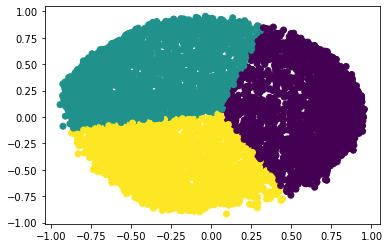

In [14]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_r)

plt.scatter(X_r['P1'], X_r['P2'], c = KMeans(n_clusters = 3).fit_predict(X_r), cmap = plt.cm.viridis) 
plt.show()


As we can see, our clusters neatly separate the data into three almost equal parts. Now let's see how our clusters can be defined in terms of the characteristics from our csv file.

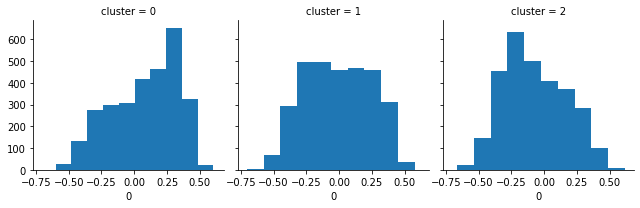

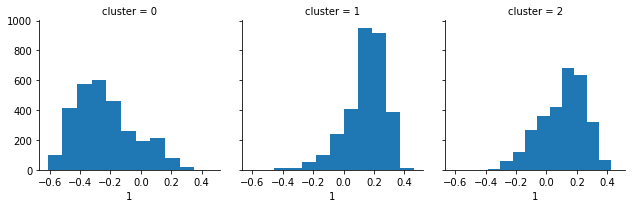

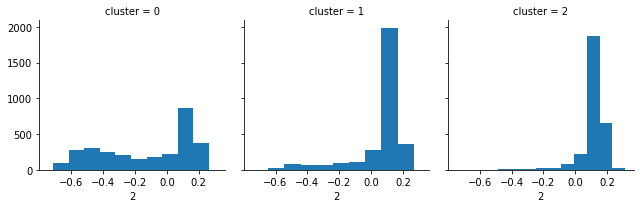

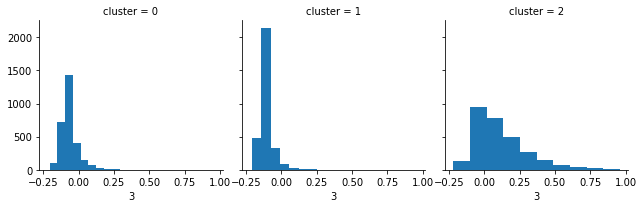

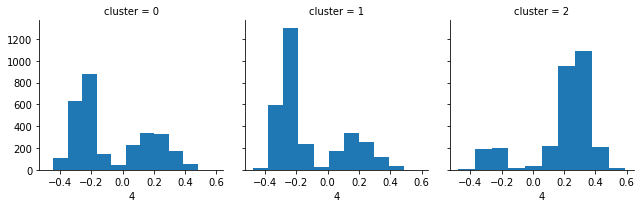

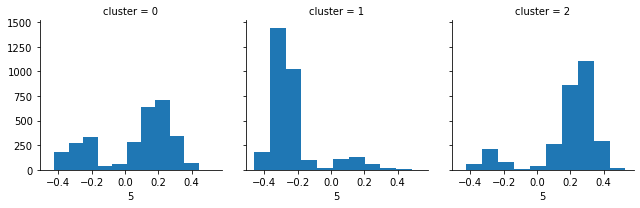

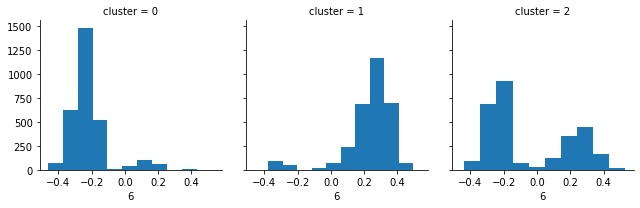

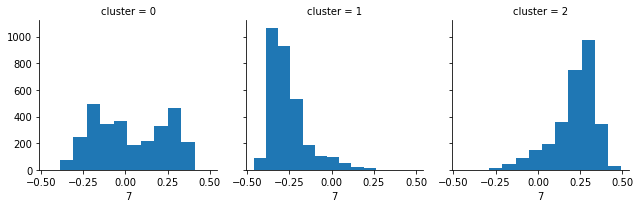

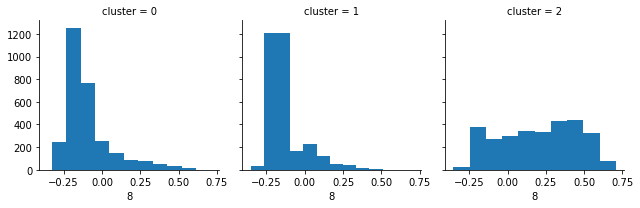

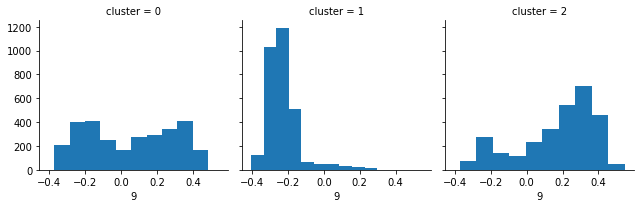

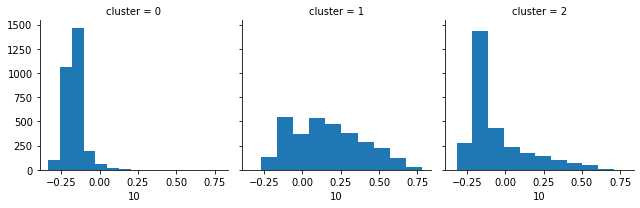

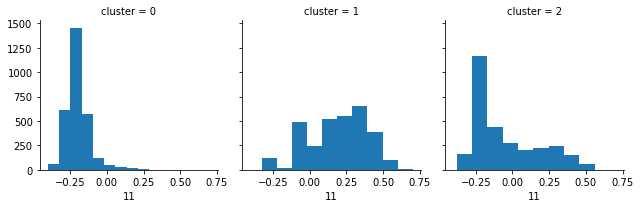

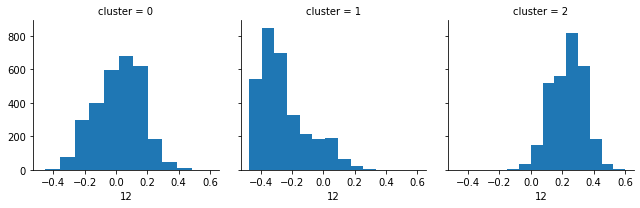

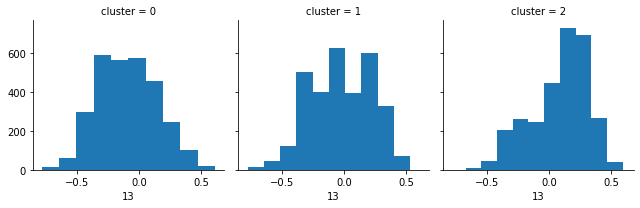

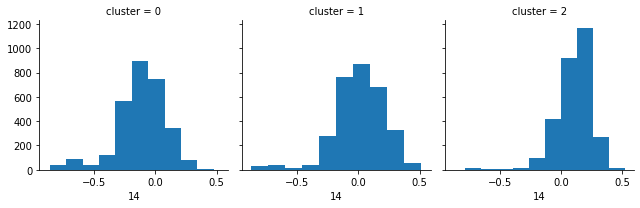

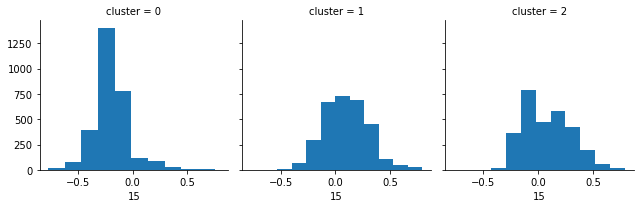

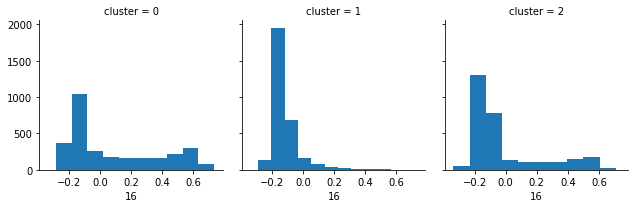

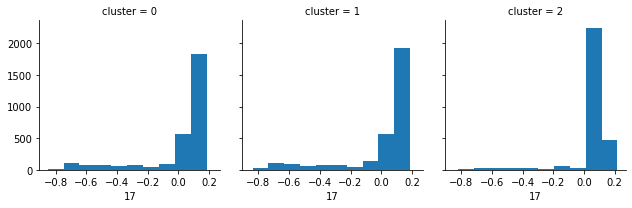

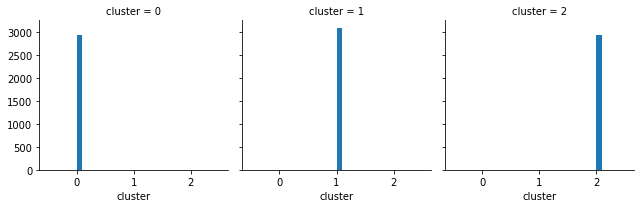

In [19]:
labels=kmeans.labels_
n_clusters=pd.concat([norm_df, pd.DataFrame({'cluster':labels})], axis=1)
for c in n_clusters:
    grid= sns.FacetGrid(n_clusters, col='cluster')
    grid.map(plt.hist, c)



From the visualizations above we can observe the following: 

* Cluster 0: Low spenders who make all types of purchases but prefer one off purchases over installments.
* Cluster 1: High spenders with a lower credit limit who rarely choose cash advance.
* Cluster 2: Average spenders with a lot of one off purchases who often go for cash advance and have the highest credit limit.


There are more characteristics that can differentiate the clusters but those had the most noticeable differences and will hopefully be enough to serve the purpose of this clustering exercise.